In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('Global_Superstore2.csv', encoding = "ISO-8859-1" )
   
df = pd.DataFrame(data)

In [3]:
del df["State"]
del df["City"]
del df["Postal Code"]
del df["Product ID"]
del df["Product Name"]
del df["Order Priority"]
del df["Order ID"]
del df["Ship Date"]
del df["Order Date"]
del df["Ship Mode"]
del df["Customer ID"]
del df["Customer Name"]
del df["Segment"]  


In [4]:
df.head()

,Row ID,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57
1,26341,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63
2,25330,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49
3,13524,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16
4,47221,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04


In [5]:
df['Category'] =df['Category'].astype('category').cat.codes
df['Sub-Category'] =df['Sub-Category'].astype('category').cat.codes
df['Country'] =df['Country'].astype('category').cat.codes
df['Market'] =df['Market'].astype('category').cat.codes
df['Region'] =df['Region'].astype('category').cat.codes

In [6]:
# df['Category'].astype('category').cat.codes   # Technology  = 2

# df['Sub-Category'].astype('category').cat.codes  # phones = 13

# df['Country'].astype('category').cat.codes   # germany =47

# df['Market'].astype('category').cat.codes  # EU 4

# df['Region'].astype('category').cat.codes  # Central = 3



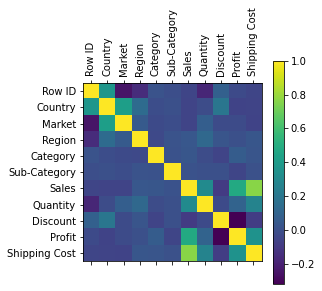

In [7]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.xticks(np.arange(11), df.columns, rotation=90)
plt.yticks(np.arange(11), df.columns, rotation=0)
plt.colorbar()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
# 'Row ID',
X = np.asarray(df[['Row ID',       'Country',        'Market',        'Region',
      'Category',  'Sub-Category',         'Sales',      'Quantity',
      'Discount',        'Shipping Cost']]) 
Y = np.asarray(df['Profit'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)


# Standard linear regression (not so good as rig regression)

Score:  0.21665793164152725
Weights:  [ 7.37471959e-05  8.53103185e-02 -4.94202016e-01 -1.67907697e-01
  1.01134528e+01 -1.64460083e+00  2.29688211e-01 -4.10051665e+00
 -2.24697610e+02 -4.32868369e-01]


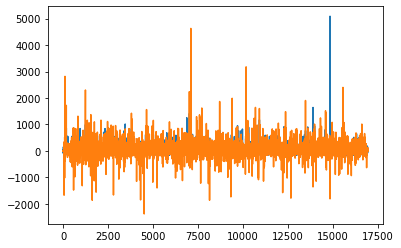

In [9]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test,)
plt.show()

# Rig-Regresission


Score:  0.21665338830947123
Weights:  [ 7.38116120e-05  8.52014152e-02 -4.92957857e-01 -1.67861255e-01
  1.01143719e+01 -1.64460786e+00  2.29690861e-01 -4.10061577e+00
 -2.24612996e+02 -4.32859914e-01]


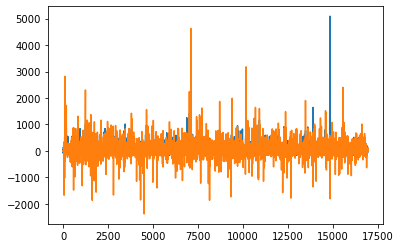

In [10]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .55)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [11]:
scores = []
coefs = []
for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .55)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.3055025737019971
[ 9.81258901e-05  7.91568569e-02 -1.90831489e-01 -9.44353536e-02
  1.00589571e+01 -1.71184858e+00  1.84704357e-01 -3.55763888e+00
 -2.29647334e+02 -1.56020942e-01]

Ridge Regression
0.30928341414493526
[ 9.72537265e-05  7.89160697e-02 -2.10213185e-01 -9.04839148e-02
  1.00389370e+01 -1.71023163e+00  1.82534027e-01 -3.50674472e+00
 -2.29691617e+02 -1.43013878e-01]


Wir können sehen, dass die Ridge-Regression bei 2000 Versuchen das überlegene Modell ist.

# Jetzt können Sie dieses Modell verwenden, um Kosten zu schätzen, indem Sie dem Modell einen Vektor mit den Features in der gleichen Reihenfolge wie das Dataset wie folgt übergeben 

gibt ein für predict |    |  Market  |  Region  |  Category |  Sub-Category  |  Sales  |  Quantity  |  Discount  |  Shipping Cost

In [12]:
'Market', 'Region','Category','Sub-Category','Sales', 'Quantity', 'Discount', 'Shipping Cost'

reg.predict([[  32298.0, 6, 6.0, 6.0, 2.0, 0.0, 5000.65, 10, 0.0, 933.57]  ])

array([749.01474797])

In [13]:
# df['Category'].astype('category').cat.codes   # Technology  = 2

# df['Sub-Category'].astype('category').cat.codes  # phones = 13

# df['Country'].astype('category').cat.codes   # germany =47

# df['Market'].astype('category').cat.codes  # EU 4

# df['Region'].astype('category').cat.codes  # Central = 3



In [14]:
df

,Row ID,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,139,6,6,2,0,2309.650,7,0.0,762.1845,933.57
1,26341,6,0,9,0,5,3709.395,9,0.1,-288.7650,923.63
2,25330,6,0,9,2,13,5175.171,9,0.1,919.9710,915.49
3,13524,47,4,3,2,13,2892.510,5,0.1,-96.5400,910.16
4,47221,110,1,0,2,6,2832.960,8,0.0,311.5200,903.04
...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,65,0,8,1,8,65.100,5,0.0,4.5000,0.01
51286,35398,139,6,3,1,1,0.444,1,0.8,-1.1100,0.01
51287,40470,139,6,12,1,7,22.920,3,0.0,11.2308,0.01
51288,9596,17,5,10,1,3,13.440,2,0.0,2.4000,0.00


In [15]:
df.loc[0].array

<PandasArray>
[32298.0, 139.0, 6.0, 6.0, 2.0, 0.0, 2309.65, 7.0, 0.0, 762.1845, 933.57]
Length: 11, dtype: float64

In [16]:
df.columns.array

<PandasArray>
[       'Row ID',       'Country',        'Market',        'Region',
      'Category',  'Sub-Category',         'Sales',      'Quantity',
      'Discount',        'Profit', 'Shipping Cost']
Length: 11, dtype: object